In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Error Handling
try:
    df = pd.read_csv('sales_data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")

df.head()



Dataset loaded successfully!


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [5]:
#Dataset Information
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)

print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (100, 7)

Column Names:
 Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

Data Types:
 Date           object
Product        object
Quantity        int64
Price           int64
Customer_ID    object
Region         object
Total_Sales     int64
dtype: object

Missing Values:
 Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64


In [7]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

# Filling missing numeric values
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Filling missing categorical values
df.fillna("Unknown", inplace=True)

print("Data cleaning completed.")


Data cleaning completed.


In [107]:
print(df.columns)


Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Amount', 'Month', 'Year'],
      dtype='object')


In [113]:
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df['Month'] = df[date_col].dt.month
df['Year'] = df[date_col].dt.year

print("Date processing done using:", date_col)


Date processing done using: Date


In [115]:
print("Total Expenses:", df[amount_col].sum())
print("Average Expense:", df[amount_col].mean())
print("Maximum Expense:", df[amount_col].max())


Total Expenses: 2580851
Average Expense: 25808.51
Maximum Expense: 49930


In [51]:
# Renaming columns
df.rename(columns={
    'Total_Sales': 'Amount',
    'Category': 'Category',
    'Date': 'Date'
}, inplace=True)


In [121]:
for col in df.columns:
    if any(word in col.lower() for word in ['amount', 'sales', 'price', 'total']):
        amount_col = col
        break

print("Detected Amount Column:", amount_col)


Detected Amount Column: Price


In [57]:
for col in df.columns:
    if any(word in col.lower() for word in ['category', 'product', 'type']):
        category_col = col
        break

print("Detected Category Column:", category_col)


Detected Category Column: Product


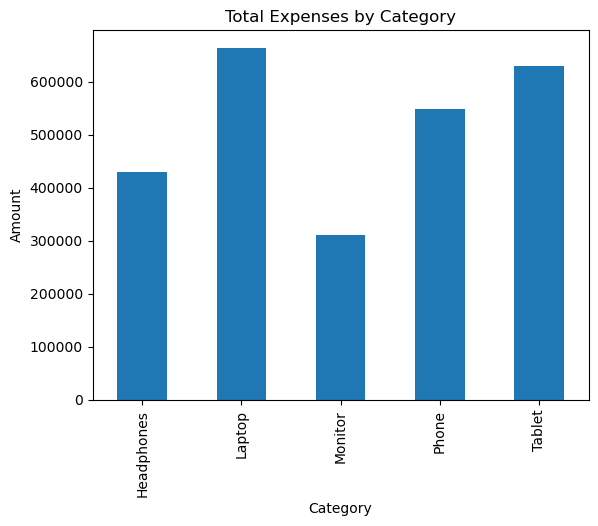

In [65]:
category_expense = df.groupby(category_col)[amount_col].sum()

plt.figure()
category_expense.plot(kind='bar')
plt.title("Total Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()



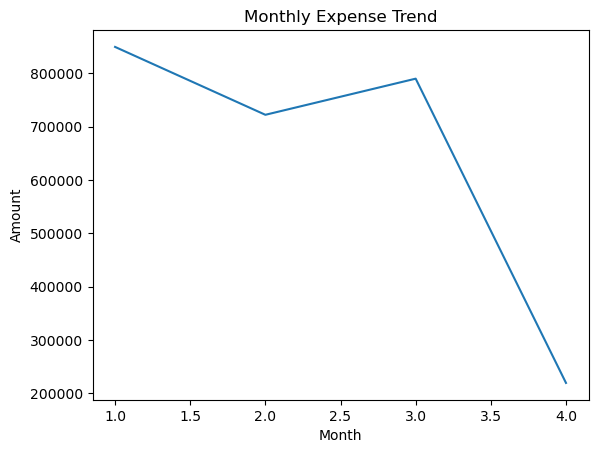

In [67]:
monthly_expense = df.groupby('Month')[amount_col].sum()

plt.figure()
monthly_expense.plot()
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()


In [73]:
print(df.columns.tolist())


['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region', 'Amount', 'Month', 'Year']


Total Expenses: 12365048
Average Expense: 123650.48
Maximum Expense: 373932


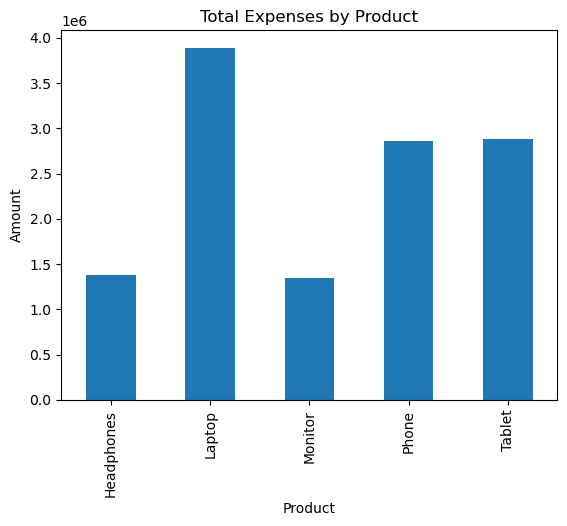

In [97]:
print("Total Expenses:", df[amount_col].sum())
print("Average Expense:", df[amount_col].mean())
print("Maximum Expense:", df[amount_col].max())

category_expense = df.groupby(category_col)[amount_col].sum()

plt.figure()
category_expense.plot(kind='bar')
plt.title("Total Expenses by Product")
plt.xlabel("Product")
plt.ylabel("Amount")
plt.show()


In [101]:
highest_category = category_expense.idxmax()
print("Highest Spending Product:", highest_category)


Highest Spending Product: Laptop


In [103]:
highest_expense = df.loc[df[amount_col].idxmax()]
print("\nHighest Expense Record:\n", highest_expense)



Highest Expense Record:
 Date           2024-01-16 00:00:00
Product                      Phone
Quantity                         9
Price                        41548
Customer_ID                CUST016
Region                       South
Amount                      373932
Month                            1
Year                          2024
Name: 15, dtype: object


In [105]:
print("Missing Values:", df.isnull().sum().sum())
print("Duplicate Rows:", df.duplicated().sum())


Missing Values: 0
Duplicate Rows: 0
